<a href="https://colab.research.google.com/github/Evora-21805468/IA-2021/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6
> Search Algorithms

## Purpose
Study the British Museum Procedure, Uninformed Search Algorithms.

## Methodology
Implementation of Depth and Breadth First Search.

## Setup

### Library import

In [8]:
# Data manipulation
import pandas as pd
import numpy as np

## Data import
We retrieve all the required data for the analysis.

In [9]:
edges = [('A', 'B'),
     ('B', 'C'),
     ('B', 'E'),
     ('B', 'F'),
     ('C', 'A'),
     ('C', 'D'),
     ('C', 'F'),
     ('D', 'F'),
     ('D', 'G'),
     ('G', 'H')
    ]

## Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

In [10]:
G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1
G

,In,Out,Weight
0,A,B,1
1,B,C,1
2,B,E,1
3,B,F,1
4,C,A,1
5,C,D,1
6,C,F,1
7,D,F,1
8,D,G,1
9,G,H,1


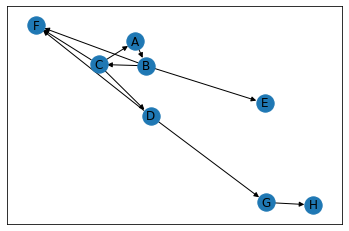

In [11]:
import networkx as nx

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
nx.draw_networkx(nG)

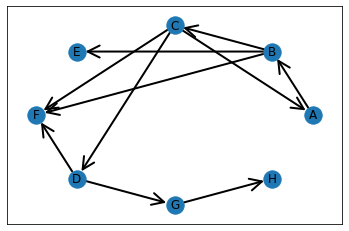

In [12]:
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
pos = nx.circular_layout(nG)   
nx.draw_networkx(nG, pos, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

If you want to look at more networks' visualization libraries in Python you can start at [link](https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259)

In [13]:
G.groupby('In').apply(lambda x: list(x['Out']))

In
A          [B]
B    [C, E, F]
C    [A, D, F]
D       [F, G]
G          [H]
dtype: object

In [14]:
graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
graph

{'A': ['B'],
 'B': ['C', 'E', 'F'],
 'C': ['A', 'D', 'F'],
 'D': ['F', 'G'],
 'G': ['H']}

## Uninformed Search

### Basic

In [33]:
def uninformed_search_basic(graph: dict, init: str, goal: str):
    """
    
    """
    
    # keep path from the start
    queue = [init]
    
    
    # auxiliar - iteration counter
    i=0 
    
    while queue:
        
        # add iteration
        i+=1
    
        head = queue[0]
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Current Head: {}\nQueue :{}\nSize: {}'.format(head, 
                                                             queue, 
                                                             len(queue)))
        
        if head == goal: 
            print('Found {}'.format(goal)) 
            break
            
        else:
            if head not in graph:
                queue = remainder
            else:
                possible_paths = graph[head]
                queue = remainder + possible_paths 
         
        print('- - - - ')

In [34]:
uninformed_search_basic(graph, 'A', 'H')

Iteration 1
Current Head: A
Queue :['A']
Size: 1
- - - - 
Iteration 2
Current Head: B
Queue :['B']
Size: 1
- - - - 
Iteration 3
Current Head: C
Queue :['C', 'E', 'F']
Size: 3
- - - - 
Iteration 4
Current Head: E
Queue :['E', 'F', 'A', 'D', 'F']
Size: 5
- - - - 
Iteration 5
Current Head: F
Queue :['F', 'A', 'D', 'F']
Size: 4
- - - - 
Iteration 6
Current Head: A
Queue :['A', 'D', 'F']
Size: 3
- - - - 
Iteration 7
Current Head: D
Queue :['D', 'F', 'B']
Size: 3
- - - - 
Iteration 8
Current Head: F
Queue :['F', 'B', 'F', 'G']
Size: 4
- - - - 
Iteration 9
Current Head: B
Queue :['B', 'F', 'G']
Size: 3
- - - - 
Iteration 10
Current Head: F
Queue :['F', 'G', 'C', 'E', 'F']
Size: 5
- - - - 
Iteration 11
Current Head: G
Queue :['G', 'C', 'E', 'F']
Size: 4
- - - - 
Iteration 12
Current Head: C
Queue :['C', 'E', 'F', 'H']
Size: 4
- - - - 
Iteration 13
Current Head: E
Queue :['E', 'F', 'H', 'A', 'D', 'F']
Size: 6
- - - - 
Iteration 14
Current Head: F
Queue :['F', 'H', 'A', 'D', 'F']
Size: 5
- - - -

### Visitors

In [ ]:
def uninformed_search_visitors(graph: dict, init: str, goal: str):
    """
    
    """
    
    # keep path from the start
    queue = [init]
    
    # Keep visited nodes
    visited = []
    
    # auxiliar - iteration counter
    i=0 
    
    while queue:
        
        # add iteration
        i+=1
    
        
        head = queue[0]
        remainder = queue[1:]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Current Head: {}\nQueue :{}\nSize: {}'.format(head, 
                                                             queue, 
                                                             len(queue)))
        
        if head == goal: 
            print('Found {}'.format(goal)) 
            break
            
        else:
            
            visited = visited.append(head) 
            # Add visited nodes here
            # Your code here
            
            if head not in graph:
                queue = remainder
            else:
                possible_paths = graph[head] #TODO todos que não estejam no visited
                queue = remainder + possible_paths 
            
        print('- - - - ')

In [ ]:
uninformed_search_visitors(graph, 'A', 'H')

Iteration 1
Current Head: A
Queue :['A']
Size: 1
- - - - 
Iteration 2
Current Head: B
Queue :['B']
Size: 1
- - - - 
Iteration 3
Current Head: C
Queue :['C', 'E', 'F']
Size: 3
- - - - 
Iteration 4
Current Head: E
Queue :['E', 'F', 'D', 'F']
Size: 4
- - - - 
Iteration 5
Current Head: F
Queue :['F', 'D', 'F']
Size: 3
- - - - 
Iteration 6
Current Head: D
Queue :['D', 'F']
Size: 2
- - - - 
Iteration 7
Current Head: F
Queue :['F', 'G']
Size: 2
- - - - 
Iteration 8
Current Head: G
Queue :['G']
Size: 1
- - - - 
Iteration 9
Current Head: H
Queue :['H']
Size: 1
Found H


### Path

This first version that keeps the path **doesn't** verify visited nodes.

In [ ]:
def uninformed_search_path(graph: dict, init: str, goal: str):
    """

    """

    # keep path from the start
    path = ()
    out = init
    queue = [(out, path)]

    # auxiliar - iteration counter
    i = 0

    while queue:

        # add iteration
        i += 1

        head = # Your code here
        remainder = # Your code here
        
        current_node = head[0]
        path = head[1]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
                                                                       head,
                                                                       queue,
                                                                       len(queue)))

        if current_node == goal:
            print('Found {}\nPath: {}'.format(goal, path))
            break

        else:
            if current_node not in graph:
                queue = # Your code here
            else:
                new_path = # Your code here

                possible_paths = # Your code here
                
                queue = remainder + possible_paths

        print('- - - - ')

In [ ]:
uninformed_search_path(graph, 'A', 'H')

Iteration 1
Current Node: A
Head :('A', ())
Queue :[('A', ())]
Size: 1
- - - - 
Iteration 2
Current Node: B
Head :('B', ('A',))
Queue :[('B', ('A',))]
Size: 1
- - - - 
Iteration 3
Current Node: C
Head :('C', ('A', 'B'))
Queue :[('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Size: 3
- - - - 
Iteration 4
Current Node: E
Head :('E', ('A', 'B'))
Queue :[('E', ('A', 'B')), ('F', ('A', 'B')), ('A', ('A', 'B', 'C')), ('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 5
- - - - 
Iteration 5
Current Node: F
Head :('F', ('A', 'B'))
Queue :[('F', ('A', 'B')), ('A', ('A', 'B', 'C')), ('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 4
- - - - 
Iteration 6
Current Node: A
Head :('A', ('A', 'B', 'C'))
Queue :[('A', ('A', 'B', 'C')), ('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 3
- - - - 
Iteration 7
Current Node: D
Head :('D', ('A', 'B', 'C'))
Queue :[('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C')), ('B', ('A', 'B', 'C', 'A'))]
Size: 3
- - - - 
Iteration 8
Current Node: F
He

This second version that keeps the path **verifies** for visited nodes.

In [ ]:
def uninformed_search_path_visitors(graph: dict, init: str, goal: str):
    """

    """

    # keep path from the start
    path = ()
    out = init
    queue = [(out, path)]

    # auxiliar - iteration counter
    i = 0

    while queue:

        # add iteration
        i += 1

        head = # Your code here
        remainder = # Your code here
        
        current_node = head[0]
        path = head[1]

        # Show the queue
        print('Iteration {}'.format(i))
        print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
                                                                       head,
                                                                       queue,
                                                                       len(queue)))

        if current_node == goal:
            print('Found {}\nPath: {}'.format(goal, path))
            break

        else:
            if current_node not in graph:
                queue = # Your code here
            else:
                new_path = # Your code here

                possible_paths = # Your code here

                queue = remainder + possible_paths

        print('- - - - ')

In [ ]:
uninformed_search_path_visitors(graph, 'A', 'H')

Iteration 1
Current Node: A
Head :('A', ())
Queue :[('A', ())]
Size: 1
- - - - 
Iteration 2
Current Node: B
Head :('B', ('A',))
Queue :[('B', ('A',))]
Size: 1
- - - - 
Iteration 3
Current Node: C
Head :('C', ('A', 'B'))
Queue :[('C', ('A', 'B')), ('E', ('A', 'B')), ('F', ('A', 'B'))]
Size: 3
- - - - 
Iteration 4
Current Node: E
Head :('E', ('A', 'B'))
Queue :[('E', ('A', 'B')), ('F', ('A', 'B')), ('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 4
- - - - 
Iteration 5
Current Node: F
Head :('F', ('A', 'B'))
Queue :[('F', ('A', 'B')), ('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 3
- - - - 
Iteration 6
Current Node: D
Head :('D', ('A', 'B', 'C'))
Queue :[('D', ('A', 'B', 'C')), ('F', ('A', 'B', 'C'))]
Size: 2
- - - - 
Iteration 7
Current Node: F
Head :('F', ('A', 'B', 'C'))
Queue :[('F', ('A', 'B', 'C')), ('F', ('A', 'B', 'C', 'D')), ('G', ('A', 'B', 'C', 'D'))]
Size: 3
- - - - 
Iteration 8
Current Node: F
Head :('F', ('A', 'B', 'C', 'D'))
Queue :[('F', ('A', 'B', 'C', 'D'))

### The British Museum Procedure

One procedure for finding the shortest path through a net is to find all possible paths and to select the best
one from them. This plodding procedure is known as the British Museum Procedure.

So far we've been selecting the first path that reaches its destiny. Let us now iterate over all possibilities. To do this let's look at a small change on our graph, let's add an edge from B to G.

{'A': ['B'],
 'B': ['C', 'E', 'F', 'G'],
 'C': ['A', 'D', 'F'],
 'D': ['F', 'G'],
 'G': ['H']}

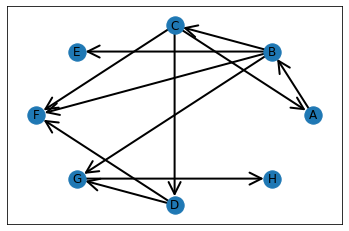

In [ ]:
edges = [('A', 'B'),
     ('B', 'C'),
     ('B', 'E'),
     ('B', 'F'),
     ('B', 'G'),
     ('C', 'A'),
     ('C', 'D'),
     ('C', 'F'),
     ('D', 'F'),
     ('D', 'G'),
     ('G', 'H')
    ]

G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
pos = nx.circular_layout(nG)   
nx.draw_networkx(nG, pos, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

new_graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
new_graph

#### Python Programming - Iterables and Generators

Recall iterables

In [ ]:
example = [0,1,2,3]

for e in example:
    print(e)

0
1
2
3


In [ ]:
while example:
    print(example.pop())

3
2
1
0


We can create an iterable and define the corresponding methods.

In [ ]:
class anIterable():
    
    def __init__(self, limit):
        self.collection = list(range(limit))
        self.pointer = 0
        
    def __iter__(self):
        return self
        
    def __next__(self):
        if self.pointer < len(self.collection):
            self.pointer += 1
            return self.collection[self.pointer-1]
        else:
            raise StopIteration
    
    def __len__(self):
        return len(self.collection)
    
    def pop(self):
        return self.collection.pop()
            
    def __str__(self):
        return str(self.collection)

In [ ]:
example = anIterable(4)
print(example)

[0, 1, 2, 3]


In [ ]:
for e in example:
    print(e)

0
1
2
3


In [ ]:
while example:
    print(example.pop())

3
2
1
0


In Python we can make use of the instruction ```yield``` to easily create an Iterable. The instruction itself returns a Generator.

In [ ]:
class anotherIterable():
    
    def __init__(self, limit):
        self.collection = list(range(limit))

        
    def __iter__(self):
        yield self.collection


In [ ]:
example = anotherIterable(4)
for value in example:
    print(value)

[0, 1, 2, 3]


In [ ]:
def iterable(limit):
    
    collection = list(range(limit))
    for value in collection:
        yield value

In [ ]:
example = iterable(4)

In [ ]:
for value in example:
    print(value)

0
1
2
3


In [ ]:
example = iterable(4)
print(next(example))
print(next(example))
print(next(example))
print(next(example))
print(next(example))

0
1
2
3


StopIteration: 

#### Back to our search algorithms

In [ ]:
def uninformed_search_path_visitors(graph: dict, init: str, goal: str):
    """

    """

    # keep path from the start
    path = ()
    out = init
    queue = [(out, path)]

    # auxiliar - iteration counter
    i = 0

    while queue:

        # add iteration
        i += 1

        head = # Your code here
        remainder = # Your code here
        
        current_node = head[0]
        path = head[1]
        
        # Show the queue
#         print('Iteration {}'.format(i))
#         print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
#                                                                        head,
#                                                                        queue,
#                                                                        len(queue)))

        if current_node == goal:
            print('################### Found {}\n#Path: {}'.format(goal, path))
            
            queue = remainder
            
            # Yield your results here 
            # Your code here

        else:

            if current_node not in graph:
                queue = # Your code here
            else:
                new_path = # Your code here

                possible_paths = # Your code here

                queue = remainder + possible_paths

In [ ]:
for path in uninformed_search_path_visitors(new_graph, 'A', 'F'):
    print(path)

################### Found F
Path: ('A', 'B')
('A', 'B', 'F')
################### Found F
Path: ('A', 'B', 'C')
('A', 'B', 'C', 'F')
################### Found F
Path: ('A', 'B', 'C', 'D')
('A', 'B', 'C', 'D', 'F')


### Depth First Search

{'A': ['B', 'E'], 'B': ['C', 'D'], 'E': ['F', 'G']}

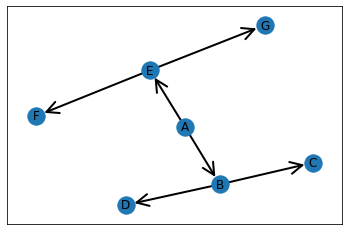

In [ ]:
edges = [('A', 'B'),
         ('A', 'E'),
     ('B', 'C'),
     ('B', 'D'),
     ('E', 'F'),
     ('E', 'G'),
    ]

G = pd.DataFrame(edges, columns=['In', 'Out'])
G['Weight'] = 1

nG = nx.from_pandas_edgelist(G, source='In', target='Out', edge_attr='Weight', create_using=nx.DiGraph)
options = {
    'width': 2,
    'arrowstyle': '->',
    'arrowsize': 30,
}
  
nx.draw_networkx(nG, with_labels = True, 
                 edge_color = 'black', arrows=True, **options)

a_graph = G.groupby('In').apply(lambda x: list(x['Out'])).to_dict()
a_graph

In [ ]:
class Stack:

    def __init__(self):
        self.stack = []
                    
    def append(self, item):
        self.stack.append(item)

    def pop(self):
        return self.stack.pop()
    
    def size(self):
        return len(self.stack)
    
    def __str__(self):
        return str(self.stack)

In [ ]:
def uninformed_search_path_visitors(graph: dict, struct, 
                                    init: str, goal: str, verbose:bool=False):
    """

    """

    # keep path from the start
    path = ()
    out = init
    
    # Add values to your structure
    # Your code here

    # auxiliar - iteration counter
    i = 0

    while struct.size():

        # add iteration
        i += 1

        # Get a valur from your structure
        # Your code here
        
        current_node = head[0]
        path = head[1]
        
        if verbose:
            # Show the queue
            print('Iteration {}'.format(i))
            print('Current Node: {}\nHead :{}\nQueue :{}\nSize: {}'.format(current_node,
                                                                           head,
                                                                           struct,
                                                                           struct.size()))

        if current_node == goal:
            print('################### Found {}\n# Path: {}'.format(goal, path))
            
            # Yield results
            # Your code here

        else:

            if current_node not in graph:
                continue
            else:
                new_path = # Your code here

                possible_paths = # Your code here
                
                # Add paths to your structure
                # Your code here

In [ ]:
for path in uninformed_search_path_visitors(a_graph, Stack(), 'A', 'G', verbose=True):
    print(path)

Iteration 1
Current Node: A
Head :('A', ())
Queue :[]
Size: 0
Iteration 2
Current Node: E
Head :('E', ('A',))
Queue :[('B', ('A',))]
Size: 1
Iteration 3
Current Node: G
Head :('G', ('A', 'E'))
Queue :[('B', ('A',)), ('F', ('A', 'E'))]
Size: 2
################### Found G
# Path: ('A', 'E')
('A', 'E', 'G')
Iteration 4
Current Node: F
Head :('F', ('A', 'E'))
Queue :[('B', ('A',))]
Size: 1
Iteration 5
Current Node: B
Head :('B', ('A',))
Queue :[]
Size: 0
Iteration 6
Current Node: D
Head :('D', ('A', 'B'))
Queue :[('C', ('A', 'B'))]
Size: 1
Iteration 7
Current Node: C
Head :('C', ('A', 'B'))
Queue :[]
Size: 0


### Breath First Search

In [ ]:
from collections import deque

class Queue:

    def __init__(self):
        self.queue = deque()

    def append(self, item):
        self.queue.append(item)

    def pop(self):
        return self.queue.popleft()
    
    def size(self):
        return len(self.queue)
    
    def __str__(self):
        return str(self.queue)

In [ ]:
for path in uninformed_search_path_visitors(a_graph, Queue(), 'A', 'G', verbose=True):
    print(path)

Iteration 1
Current Node: A
Head :('A', ())
Queue :deque([])
Size: 0
Iteration 2
Current Node: B
Head :('B', ('A',))
Queue :deque([('E', ('A',))])
Size: 1
Iteration 3
Current Node: E
Head :('E', ('A',))
Queue :deque([('C', ('A', 'B')), ('D', ('A', 'B'))])
Size: 2
Iteration 4
Current Node: C
Head :('C', ('A', 'B'))
Queue :deque([('D', ('A', 'B')), ('F', ('A', 'E')), ('G', ('A', 'E'))])
Size: 3
Iteration 5
Current Node: D
Head :('D', ('A', 'B'))
Queue :deque([('F', ('A', 'E')), ('G', ('A', 'E'))])
Size: 2
Iteration 6
Current Node: F
Head :('F', ('A', 'E'))
Queue :deque([('G', ('A', 'E'))])
Size: 1
Iteration 7
Current Node: G
Head :('G', ('A', 'E'))
Queue :deque([])
Size: 0
################### Found G
# Path: ('A', 'E')
('A', 'E', 'G')


### Exercise

Apply the both searches to the ```new_graph``` and interpret the resulting paths.